In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# data (as pandas dataframes)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# metadata
print(heart_failure_clinical_records.metadata)

# variable information
print(heart_failure_clinical_records.variables)


{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'title': 'Machine learning can predict survival of patients with heart failure from serum creatinine and ejec

In [6]:
df = pd.DataFrame(X)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [7]:
df['death_event'] = y
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df_dead = df[df['death_event'] == 1]
serum_creatinine_mean = df_dead['serum_creatinine'].mean()
serum_creatinine_median = df_dead['serum_creatinine'].median()
serum_creatinine_std = df_dead['serum_creatinine'].std()

ejection_fraction_mean = df_dead['ejection_fraction'].mean()
ejection_fraction_median = df_dead['ejection_fraction'].median()
ejection_fraction_std = df_dead['ejection_fraction'].std()

print("Serum Creatinine - Mean: ", serum_creatinine_mean)
print("Serum Creatinine - Median: ", serum_creatinine_median)
print("Serum Creatinine - Standard Deviation: ", serum_creatinine_std)

print("\nEjection Fraction - Mean: ", ejection_fraction_mean)
print("Ejection Fraction - Median: ", ejection_fraction_median)
print("Ejection Fraction - Standard Deviation: ", ejection_fraction_std)

Serum Creatinine - Mean:  1.8358333333333334
Serum Creatinine - Median:  1.3
Serum Creatinine - Standard Deviation:  1.4685615351275343

Ejection Fraction - Mean:  33.46875
Ejection Fraction - Median:  30.0
Ejection Fraction - Standard Deviation:  12.52530333701386


In [9]:
df_older_than_60 = df[df['age'] > 60]
df_older_than_60.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


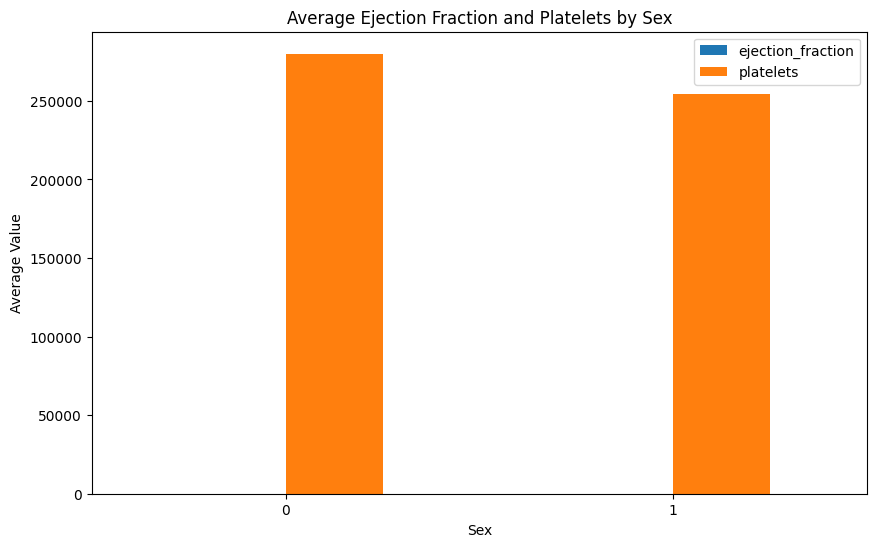

In [10]:
grouped = df.groupby('sex')[['ejection_fraction', 'platelets']].mean()

grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Average Ejection Fraction and Platelets by Sex')
plt.ylabel('Average Value')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.show()

In [11]:
pivot_table = df.pivot_table(values='serum_sodium', index='smoking', columns='diabetes', aggfunc='mean')
print(pivot_table)

diabetes           0           1
smoking                         
0         136.972222  136.200000
1         136.939394  136.033333


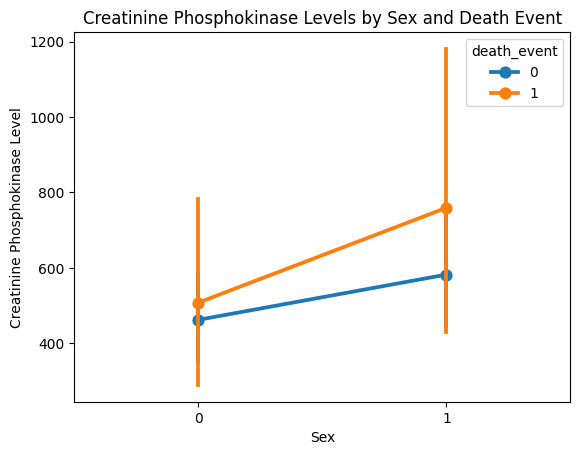

In [12]:
sns.pointplot(x='sex', y='creatinine_phosphokinase', hue='death_event', data=df)
plt.title('Creatinine Phosphokinase Levels by Sex and Death Event')
plt.xlabel('Sex')
plt.ylabel('Creatinine Phosphokinase Level')
plt.show()

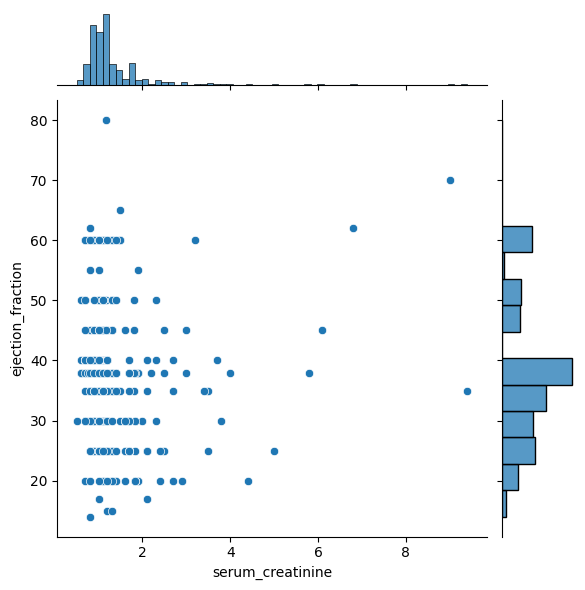

In [13]:
sns.jointplot(x='serum_creatinine', y='ejection_fraction', data=df, kind='scatter')
plt.show()

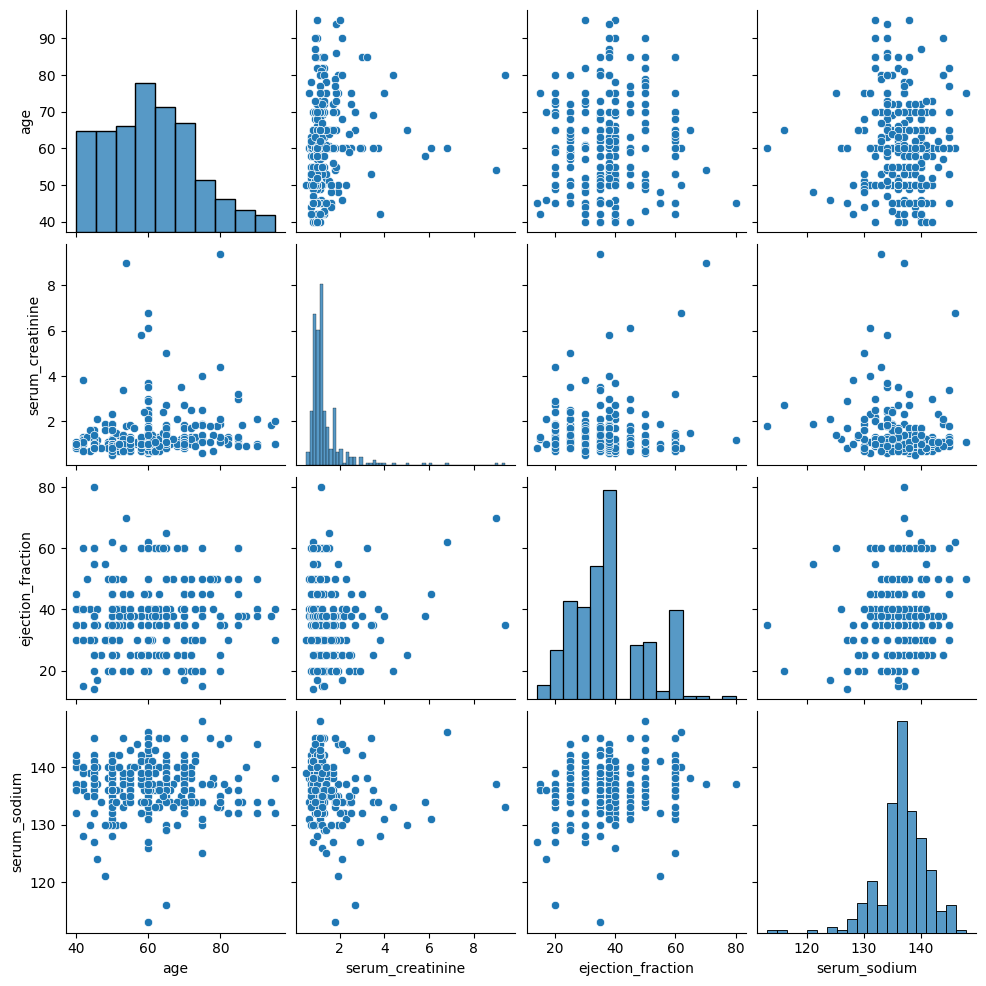

In [14]:
sns.pairplot(df, vars=['age', 'serum_creatinine', 'ejection_fraction', 'serum_sodium'])
plt.show()

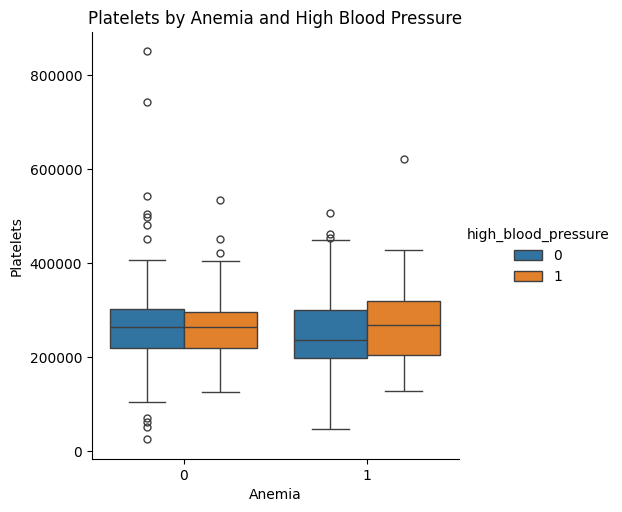

In [15]:
sns.catplot(x='anaemia', y='platelets', hue='high_blood_pressure', data=df, kind='box')
plt.title('Platelets by Anemia and High Blood Pressure')
plt.xlabel('Anemia')
plt.ylabel('Platelets')
plt.show()

In [16]:
class Patient:
    def __init__(self, age, anaemia, creatinine_phosphokinase, diabetes,
                 ejection_fraction, high_blood_pressure, platelets,
                 serum_creatinine, serum_sodium, sex, smoking, time,
                 death_event):
        self.age = age
        self.anaemia = anaemia
        self.creatinine_phosphokinase = creatinine_phosphokinase
        self.diabetes = diabetes
        self.ejection_fraction = ejection_fraction
        self.high_blood_pressure = high_blood_pressure
        self.platelets = platelets
        self.serum_creatinine = serum_creatinine
        self.serum_sodium = serum_sodium
        self.sex = sex
        self.smoking = smoking
        self.time = time
        self.death_event = death_event

    def is_smoker(self):
        return self.smoking == 1

    def has_diabetes(self):
        return self.diabetes == 1

    def calculate_follow_up_period(self):
        return self.time